In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [119]:
from scipy import stats
from sklearn.model_selection import train_test_split

In [2]:
customer_data = pd.read_csv("mall_customer.csv")

In [15]:
customer_data.shape

(200, 5)

In [3]:
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
customer_data.columns = ["ID", "gender", "age", "income", "spending_score"]

In [5]:
customer_data.head(3)

,ID,gender,age,income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [6]:
customer_data.isnull().sum()

ID                0
gender            0
age               0
income            0
spending_score    0
dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
customer_data["gender"] = encoder.fit_transform(customer_data["gender"])

In [12]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
ID                200 non-null int64
gender            200 non-null int32
age               200 non-null int64
income            200 non-null int64
spending_score    200 non-null int64
dtypes: int32(1), int64(4)
memory usage: 7.2 KB


In [13]:
customer_data.head(2)

,ID,gender,age,income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81


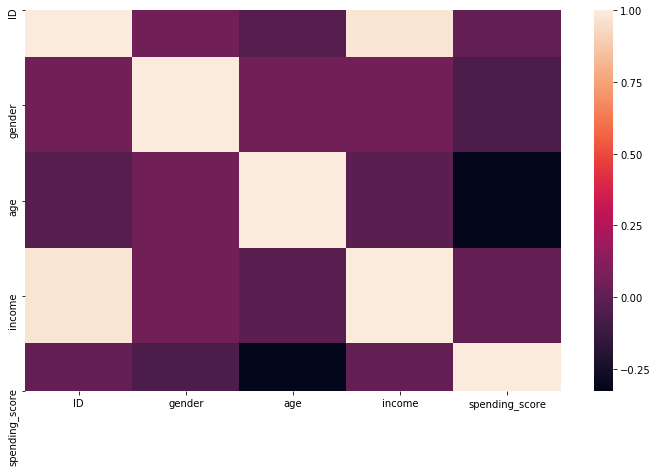

In [16]:
plt.figure(figsize=(12, 7))
corr_mat = customer_data.corr()
sns.heatmap(corr_mat)

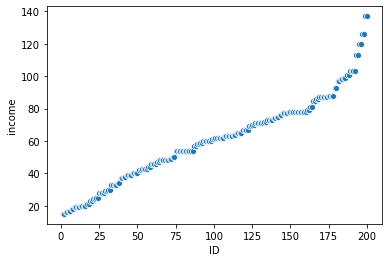

In [95]:
sns.scatterplot(customer_data["ID"], customer_data["income"])

##### Conclusion:

### Univerent Analysis

#### Spending Score

In [14]:
customer_data["spending_score"].describe()

count    200.000000
mean      50.200000
std       25.823522
min        1.000000
25%       34.750000
50%       50.000000
75%       73.000000
max       99.000000
Name: spending_score, dtype: float64

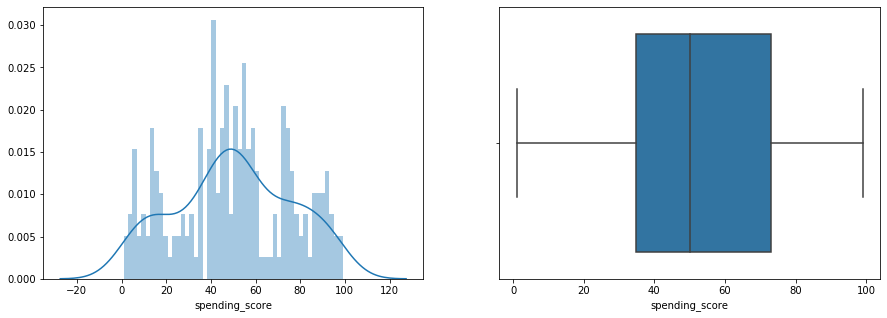

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.distplot(customer_data["spending_score"], bins=50, ax=ax[0])
sns.boxplot(customer_data["spending_score"], ax=ax[1])

#### Gender

In [23]:
customer_data["gender"].unique()

array([1, 0], dtype=int64)

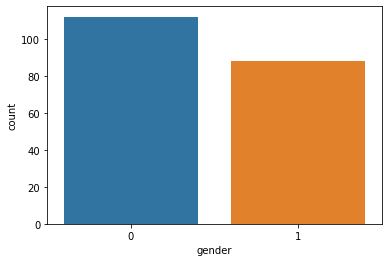

In [24]:
sns.countplot(customer_data["gender"])

In [27]:
customer_data["gender"].value_counts(normalize=True)

0    0.56
1    0.44
Name: gender, dtype: float64

#### Age

In [28]:
customer_data["age"].unique()

array([19, 21, 20, 23, 31, 22, 35, 64, 30, 67, 58, 24, 37, 52, 25, 46, 54,
       29, 45, 40, 60, 53, 18, 49, 42, 36, 65, 48, 50, 27, 33, 59, 47, 51,
       69, 70, 63, 43, 68, 32, 26, 57, 38, 55, 34, 66, 39, 44, 28, 56, 41],
      dtype=int64)

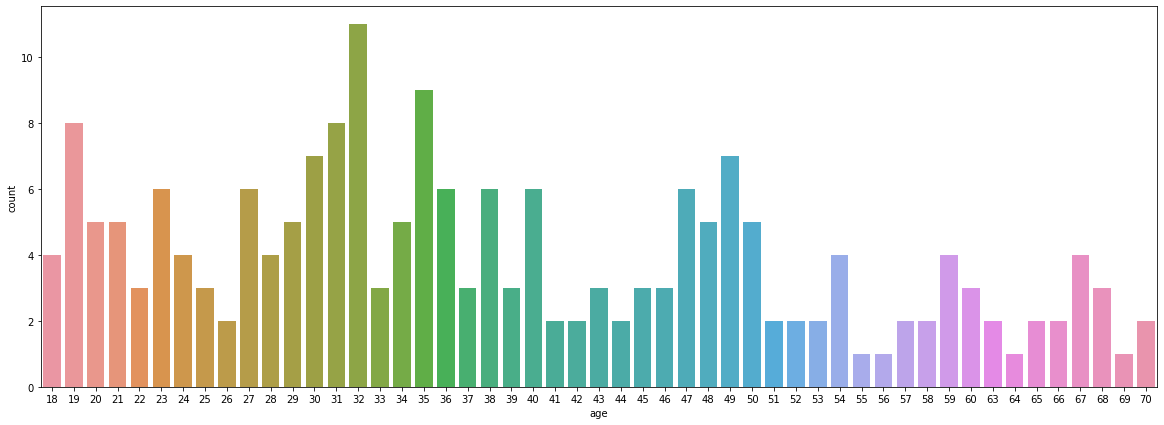

In [35]:
plt.figure(figsize=(20, 7))
sns.countplot(customer_data["age"])

#### Income

In [36]:
customer_data["income"].describe()

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: income, dtype: float64

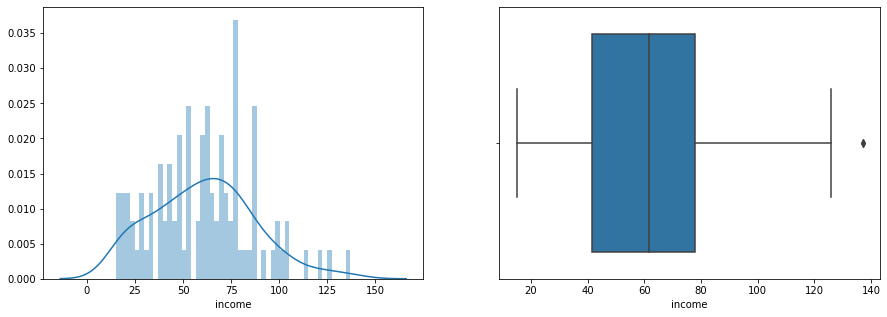

In [37]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.distplot(customer_data["income"], bins=50, ax=ax[0])
sns.boxplot(customer_data["income"], ax=ax[1])

### Multivarient Analysis

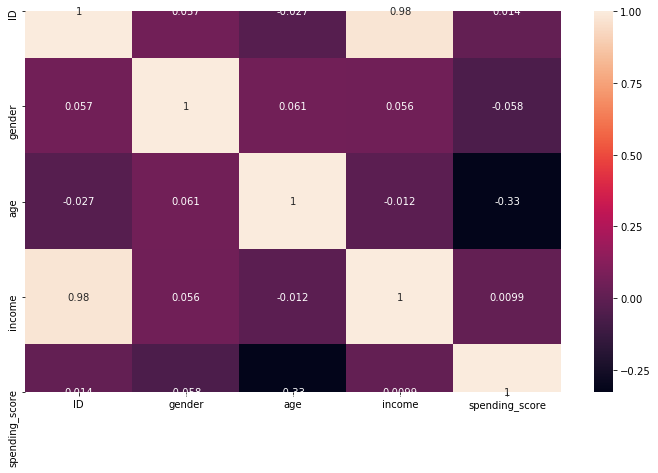

In [97]:
plt.figure(figsize=(12, 7))
corr_mat = customer_data.corr()
sns.heatmap(corr_mat, annot=True)

#### Gender

In [39]:
customer_data.groupby("gender")["spending_score"].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
0,112.0,51.526786,24.11495,5.0,35.0,50.0,73.0,99.0
1,88.0,48.511364,27.89677,1.0,24.5,50.0,70.0,97.0


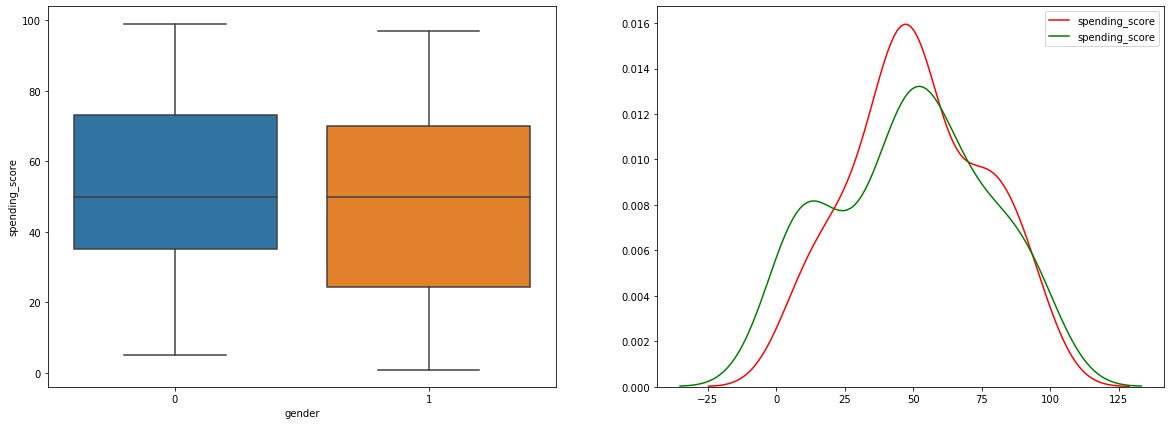

In [42]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))
sns.boxplot(customer_data["gender"], customer_data["spending_score"], ax=ax[0])
sns.kdeplot(customer_data[customer_data["gender"] == 0]["spending_score"], color='r',ax=ax[1])
sns.kdeplot(customer_data[customer_data["gender"] == 1]["spending_score"], color='g',ax=ax[1])

#### Age

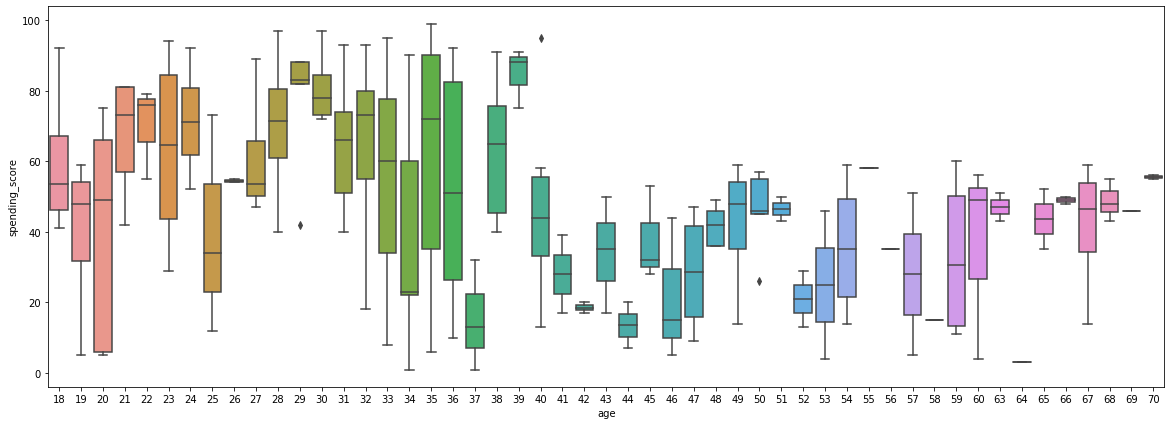

In [44]:
plt.figure(figsize=(20, 7))
sns.boxplot(customer_data["age"], customer_data["spending_score"])

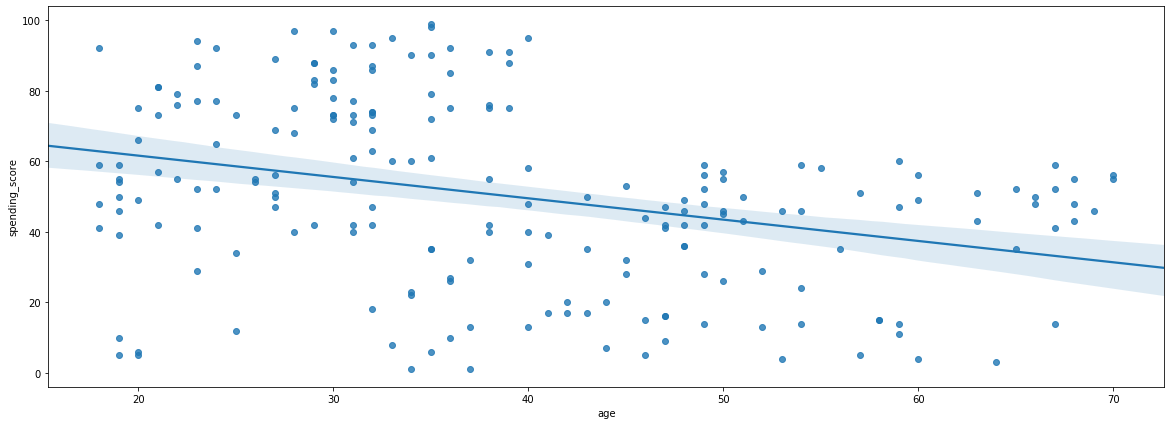

In [79]:
plt.figure(figsize=(20, 7))
sns.regplot(customer_data["age"], customer_data["spending_score"])

#### Income

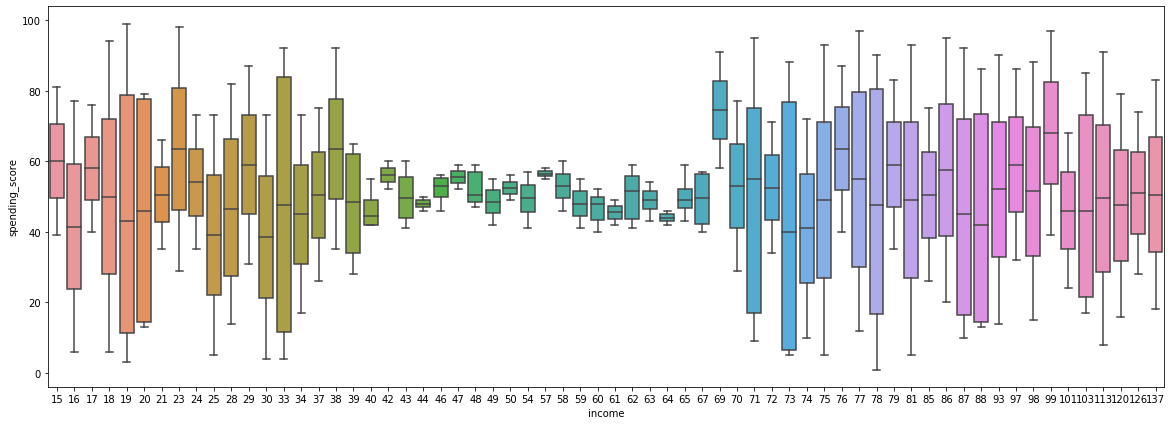

In [51]:
plt.figure(figsize=(20, 7))
sns.boxplot(customer_data["income"], customer_data["spending_score"])

<Figure size 1440x504 with 0 Axes>

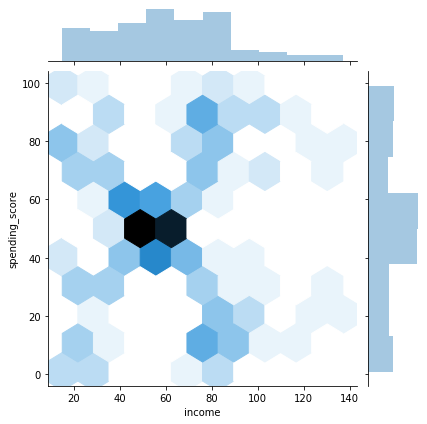

In [118]:
plt.figure(figsize=(20, 7))
sns.jointplot(customer_data["income"], customer_data["spending_score"], kind="hex")

#### Age, Income and Spending Score

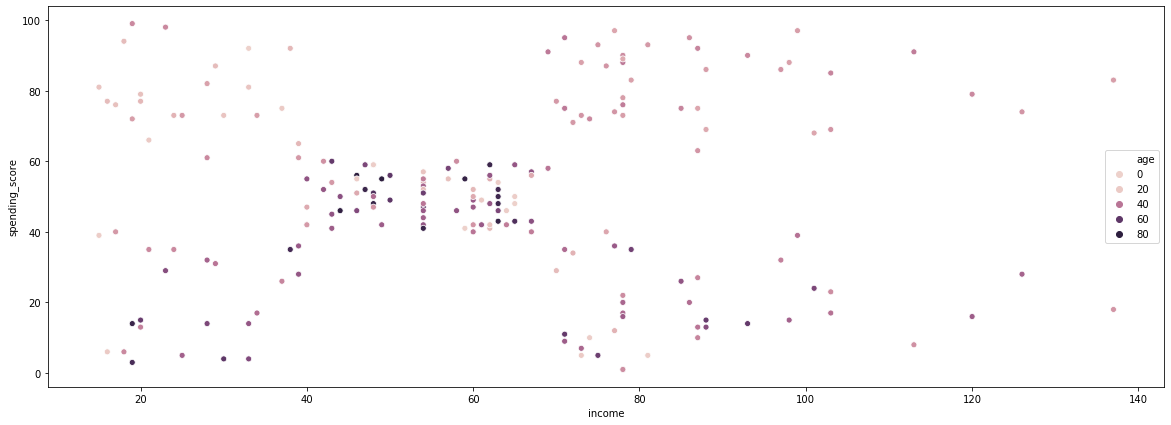

In [115]:
plt.figure(figsize=(20, 7))
sns.scatterplot(customer_data["income"], customer_data["spending_score"], hue=customer_data["age"])

In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

data = customer_data.copy()
data["age"] = scaler.fit_transform(data["age"].values.reshape(-1, 1))
data["income"] = scaler.fit_transform(data["income"].values.reshape(-1, 1))
data["spending_score"] = scaler.fit_transform(data["spending_score"].values.reshape(-1, 1))

In [56]:
data.head()

,ID,gender,age,income,spending_score
0,1,1,-1.424569,-1.738999,-0.434801
1,2,1,-1.281035,-1.738999,1.195704
2,3,0,-1.352802,-1.700830,-1.715913
3,4,0,-1.137502,-1.700830,1.040418
4,5,0,-0.563369,-1.662660,-0.395980


### Linear Regression using all columns

In [125]:
X = data.drop(columns=["ID", "spending_score"])
y = data["spending_score"]

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12)

In [142]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [143]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_reg_pred = linear_reg.predict(X_test)

In [173]:
np.sqrt(mean_squared_error(scaler.inverse_transform(y_test), scaler.inverse_transform(linear_reg_pred)))

26.96678822161124

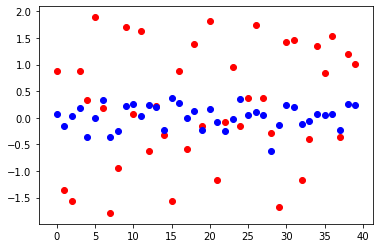

In [145]:
plt.scatter(range(0, len(y_test)), y_test, color='r')
plt.scatter(range(0, len(y_test)), linear_reg_pred, color='b')

#### Prediction Using Just Income Column

In [163]:
X = data["income"]
y = data["spending_score"]

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [165]:
linear_reg = LinearRegression()
linear_reg.fit(np.array(X_train).reshape(-1, 1), y_train)
linear_reg_pred = linear_reg.predict(np.array(X_test).reshape(-1, 1))

In [166]:
np.sqrt(mean_squared_error(scaler.inverse_transform(y_test), scaler.inverse_transform(linear_reg_pred)))

29.475983940213183

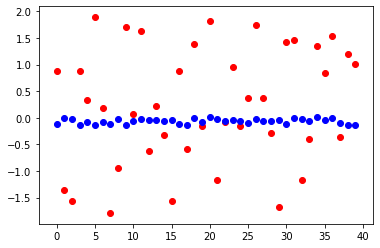

In [156]:
plt.scatter(range(0, len(y_test)), y_test, color='r')
plt.scatter(range(0, len(y_test)), linear_reg_pred, color='b')

#### Prediction Using Just Age Column

In [167]:
X = data["age"]
y = data["spending_score"]

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [170]:
linear_reg = LinearRegression()
linear_reg.fit(np.array(X_train).reshape(-1, 1), y_train)
linear_reg_pred = linear_reg.predict(np.array(X_test).reshape(-1, 1))

In [171]:
np.sqrt(mean_squared_error(scaler.inverse_transform(y_test), scaler.inverse_transform(linear_reg_pred)))

26.96678822161124

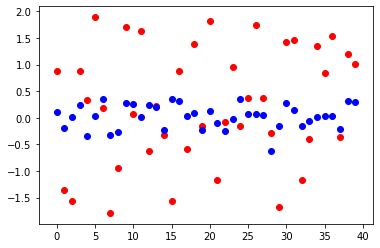

In [172]:
plt.scatter(range(0, len(y_test)), y_test, color='r')
plt.scatter(range(0, len(y_test)), linear_reg_pred, color='b')

#### Prediction Using Just Gender Column

In [174]:
X = data["gender"]
y = data["spending_score"]

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [176]:
linear_reg = LinearRegression()
linear_reg.fit(np.array(X_train).reshape(-1, 1), y_train)
linear_reg_pred = linear_reg.predict(np.array(X_test).reshape(-1, 1))

In [177]:
np.sqrt(mean_squared_error(scaler.inverse_transform(y_test), scaler.inverse_transform(linear_reg_pred)))

29.216197554352625

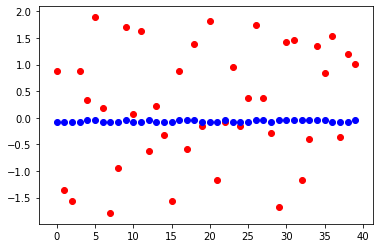

In [178]:
plt.scatter(range(0, len(y_test)), y_test, color='r')
plt.scatter(range(0, len(y_test)), linear_reg_pred, color='b')

### Support Vector Machine

In [181]:
from sklearn.svm import SVR

In [205]:
X = data.drop(columns=["ID", "spending_score"])
y = data["spending_score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

svr = SVR(C=1)
svr.fit(X_train, y_train)
svr_pred = svr.predict(X_test)

In [206]:
np.sqrt(mean_squared_error(scaler.inverse_transform(y_test), scaler.inverse_transform(svr_pred)))

21.585054398530215

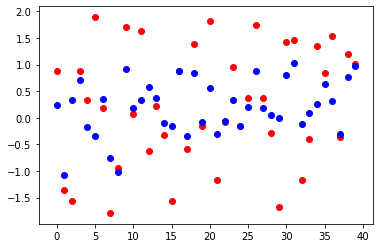

In [208]:
plt.scatter(range(0, len(y_test)), y_test, color='r')
plt.scatter(range(0, len(y_test)), svr_pred, color='b')

In [213]:
from sklearn.model_selection import learning_curve

train_size, train_score, test_score = \
        learning_curve(svr, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, shuffle=True)

In [214]:
train_mean = np.mean(train_score, axis=1)
train_std = np.std(train_score, axis=1)
test_mean = np.mean(test_score, axis=1)
test_std = np.std(test_score, axis=1)

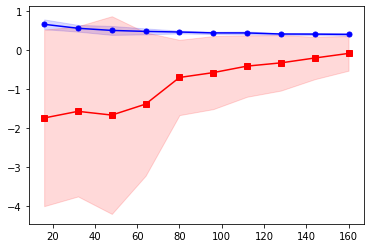

In [217]:
plt.plot(train_size, train_mean, color='blue', marker='o', markersize=5)
plt.fill_between(train_size, train_mean+train_std, train_mean-train_std, alpha=0.15, color='blue')
plt.plot(train_size, test_mean, color="red", marker='s')
plt.fill_between(train_size, test_mean+test_std, test_mean-test_std, alpha=0.15, color='red')